<b><h1> Image Denoising with Deep Convolutional AutoEncoder</h1><b>

In [0]:
# Reading the Dataset of MNIST
# importing necessary libraries
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

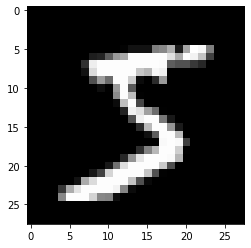

In [43]:
# showing image from the data
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image,cmap='gray')

In [44]:
x_train.shape

(60000, 28, 28)

In [0]:
# Normalizing the input data
x_train = x_train/255.
x_test = x_test/255.

# Reshaping the input
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [46]:
x_train.shape #added color channel to the image

(60000, 28, 28, 1)

In [53]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
# Adding noise to the image 
noise_factor = 0.3

x_train_noise = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [0]:
x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

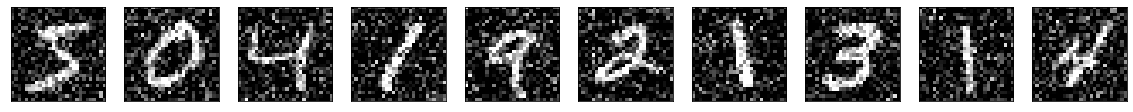

In [49]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display noisy images
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# creating our Model 
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input, Dense
from keras.models import Model


input_img = Input(shape=(28, 28, 1))

# # creating the encoder model here
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

# # creating the decoder model here
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# combining both Encoder and Decoder to get an Auto Encoder
autoencoder = Model(input_img, decoded)
# compiling the model
from keras.optimizers import adadelta
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [54]:
# fitting and training the model on our data
autoencoder.fit(x_train_noise, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.1483 - val_loss: 0.0987
Epoch 2/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0968 - val_loss: 0.0895
Epoch 3/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0913 - val_loss: 0.0871
Epoch 4/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0885 - val_loss: 0.0877
Epoch 5/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0866 - val_loss: 0.0840
Epoch 6/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0852 - val_loss: 0.0834
Epoch 7/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0843 - val_loss: 0.0831
Epoch 8/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0835 - val_loss: 0.0816
Epoch 9/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0830 - val_loss: 0.

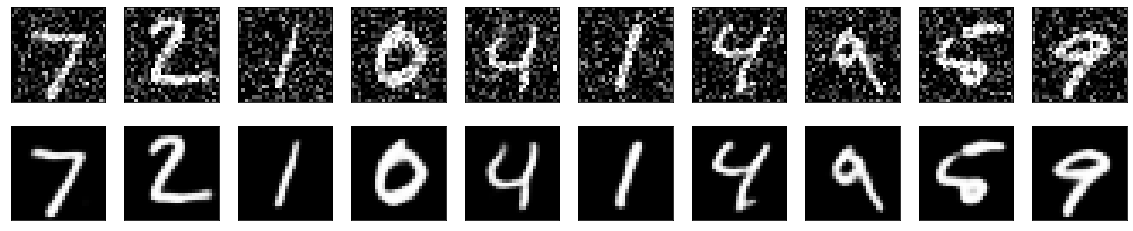

In [55]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<b><h1> Image Reconstruction with Deep AutoEncoder</h1><b>

In [71]:
!pip install keract

In [79]:
'''
  Visualizing the encoded state of a simple autoencoder created with the Keras Functional API
  with Keract.
'''
import keras
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
from keract import get_activations, display_activations
import matplotlib.pyplot as plt

# Model configuration
img_width, img_height = 28, 28
initial_dimension = img_width * img_height
batch_size = 128
no_epochs = 10
validation_split = 0.2
verbosity = 1
encoded_dim = 50

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], initial_dimension)
input_test = input_test.reshape(input_test.shape[0], initial_dimension)
input_shape = (initial_dimension, )

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define the layers
inputs = Input(shape=input_shape)
encoding_layer = Dense(encoded_dim, activation='relu', kernel_initializer='he_normal')(inputs)
decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)

# Instantiate the autoencoder
autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')

# Instantiate the encoder
encoder = Model(inputs, encoding_layer, name='encoder')

# Instantiate the decoder
encoded_input = Input(shape=(encoded_dim, ))
final_ae_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')

# Compile the autoencoder
encoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Give us some insights
autoencoder.summary()
encoder.summary()
decoder.summary()

# Fit data
autoencoder.fit(input_train, input_train, epochs=no_epochs, batch_size=batch_size, validation_split=validation_split)

Model: "full_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                39250     
Total params: 39,250
Trainabl

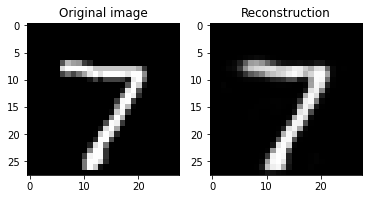

In [78]:
# =============================================
# Take a sample for visualization purposes
# =============================================
input_sample = input_test[:1]
reconstruction = autoencoder.predict([input_sample])

# =============================================
# Visualize input-->reconstruction
# =============================================
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(6, 3.5)
input_sample_reshaped = input_sample.reshape((img_width, img_height))
reconsstruction_reshaped = reconstruction.reshape((img_width, img_height))
axes[0].imshow(input_sample_reshaped) 
axes[0].set_title('Original image')
axes[1].imshow(reconsstruction_reshaped)
axes[1].set_title('Reconstruction')
plt.show()

input_17 (784,) -> Skipped. First dimension is not 1.
dense_7 (1, 50) 


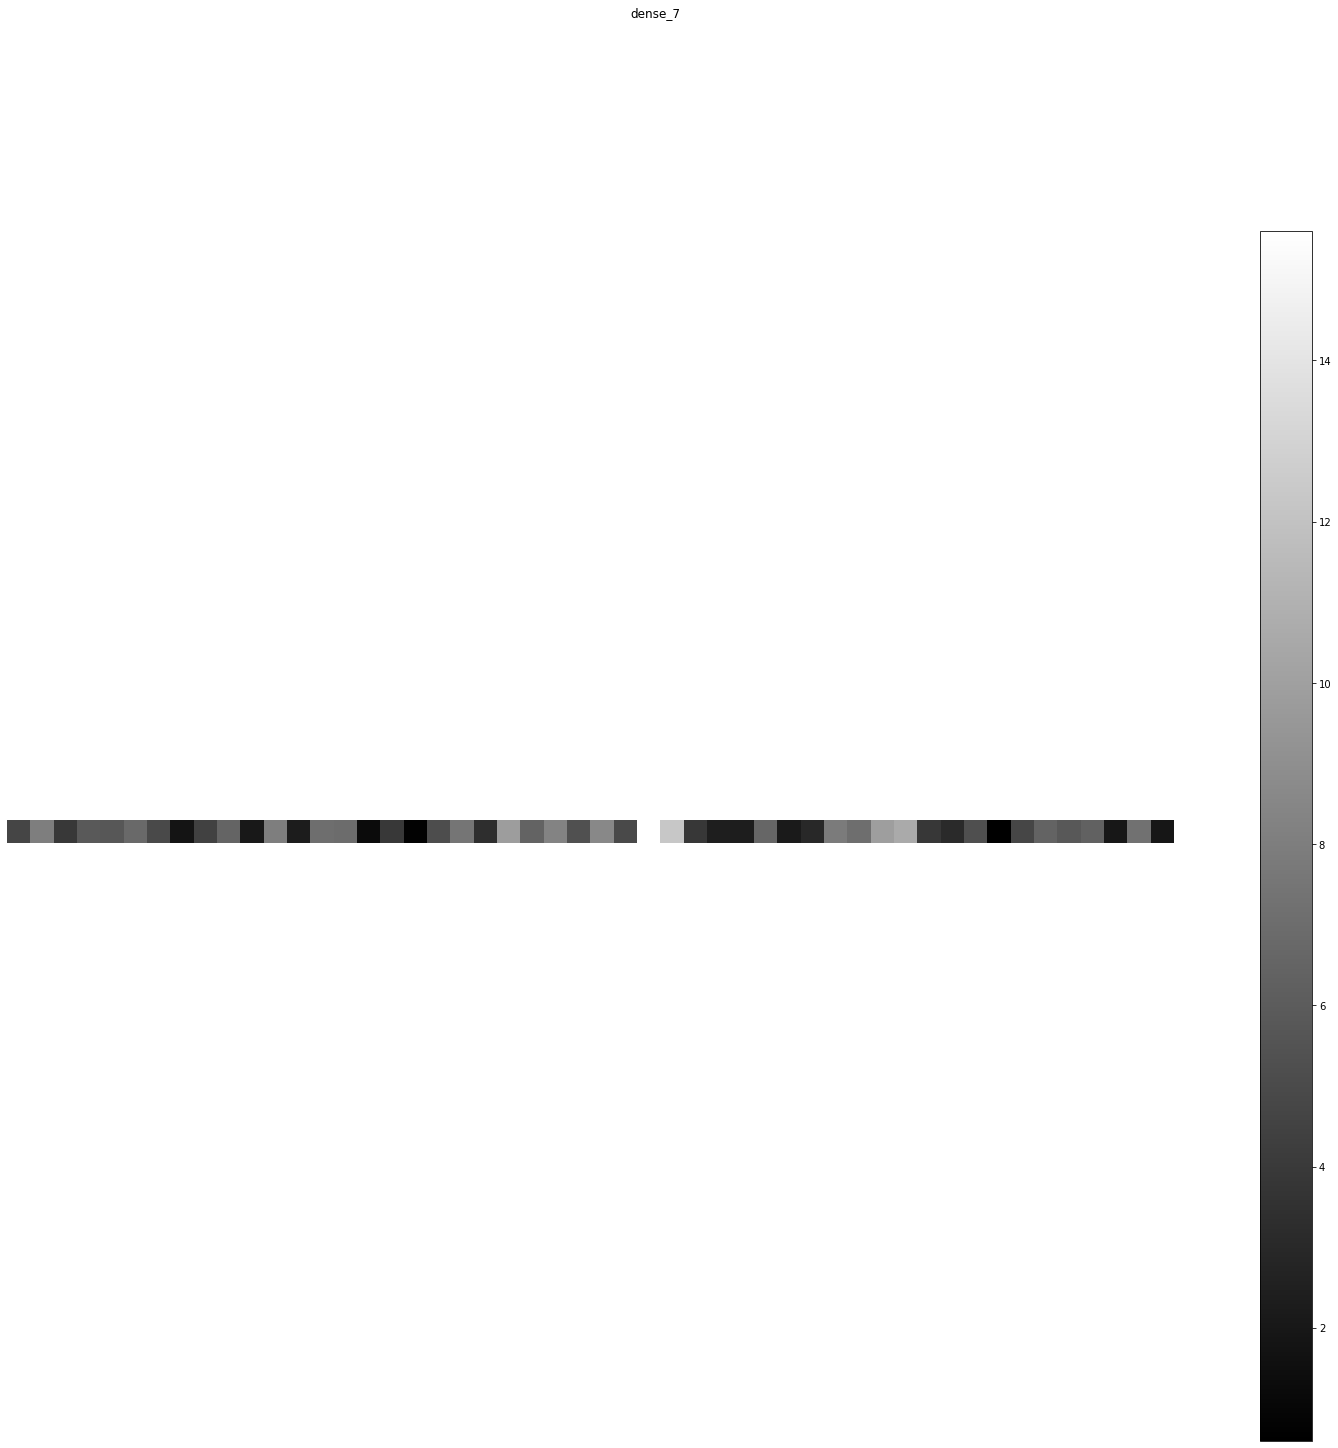

In [81]:

# =============================================
# Visualize encoded state with Keract
# =============================================
activations = get_activations(encoder, input_sample)
display_activations(activations, cmap="gray", save=False)